# SENSOR RANKING

#### Importing all libraries needed to solve the task

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import xgboost
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from boruta import BorutaPy

In [2]:
data = pd.read_csv("./task_data.csv");
target = data.class_label
data = data.drop(['sample index', 'class_label'], axis = 1)
data

,sensor0,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9
0,0.834251,0.726081,0.535904,0.214896,0.873788,0.767605,0.111308,0.557526,0.599650,0.665569
1,0.804059,0.253135,0.869867,0.334285,0.604075,0.494045,0.833575,0.194190,0.014966,0.802918
2,0.694404,0.595777,0.581294,0.799003,0.762857,0.651393,0.075905,0.007186,0.659633,0.831009
3,0.783690,0.038780,0.285043,0.627305,0.800620,0.486340,0.827723,0.339807,0.731343,0.892359
4,0.788835,0.174433,0.348770,0.938244,0.692065,0.377620,0.183760,0.616805,0.492899,0.930969
...,...,...,...,...,...,...,...,...,...,...
395,0.433150,0.816109,0.452945,0.065469,0.237093,0.719321,0.577969,0.085598,0.357115,0.070060
396,0.339346,0.914610,0.097827,0.077522,0.484140,0.690568,0.420054,0.482845,0.395148,0.438641
397,0.320118,0.444951,0.401896,0.970993,0.960264,0.138345,0.354927,0.230749,0.204612,0.558889
398,0.059132,0.337426,0.772847,0.099038,0.966042,0.975086,0.532891,0.035839,0.258723,0.709958


### As per problem statement, the emphasis is on identifying the importance of a particular feature in the machine learning model. This is a classification problem wherein we need to identify the important feature and we need to justify the reasons by showing why we have chosen a specific feature and how it turns out to be an important feature. Identifying important features is very important due to the following reasons:
1. It will help us improve the models by concentrating on important features (variables).
2. It will help us get rid of features that are not relevant or which do not contribute to the models performance.

## Exploratory Data Analysis (EDA)

#### 1) Understanding the data for outliers 
#### 2) Check for missing values in the dataset
#### 3) Check correlation between independent variables (features) and dependent variable (target)

In [3]:
data.describe()

,sensor0,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.523661,0.509223,0.481238,0.509752,0.497875,0.501065,0.490480,0.482372,0.482822,0.541933
std,0.268194,0.276878,0.287584,0.297712,0.288208,0.287634,0.289954,0.282714,0.296180,0.272490
min,0.007775,0.003865,0.004473,0.001466,0.000250,0.000425,0.000173,0.003322,0.003165,0.000452
25%,0.299792,0.283004,0.235544,0.262697,0.249369,0.269430,0.226687,0.242848,0.213626,0.321264
50%,0.534906,0.507583,0.460241,0.510066,0.497842,0.497108,0.477341,0.463438,0.462251,0.578389
75%,0.751887,0.727843,0.734937,0.768975,0.743401,0.738854,0.735304,0.732483,0.740542,0.768990
max,0.999476,0.998680,0.992963,0.995119,0.999412,0.997367,0.997141,0.998230,0.996098,0.999465


In [4]:
# Checking for outliers with the InterQuartile Range
# It is a measure of the dispersion similar to standard deviation or variance, but is much more robust against outliers.
## https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

data_out = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
print(data_out.shape)
print(data.shape)

sensor0    0.452095
sensor1    0.444839
sensor2    0.499392
sensor3    0.506277
sensor4    0.494032
sensor5    0.469424
sensor6    0.508617
sensor7    0.489635
sensor8    0.526917
sensor9    0.447726
dtype: float64
(400, 10)
(400, 10)


In [5]:
#Checking for missing values

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sensor0  400 non-null    float64
 1   sensor1  400 non-null    float64
 2   sensor2  400 non-null    float64
 3   sensor3  400 non-null    float64
 4   sensor4  400 non-null    float64
 5   sensor5  400 non-null    float64
 6   sensor6  400 non-null    float64
 7   sensor7  400 non-null    float64
 8   sensor8  400 non-null    float64
 9   sensor9  400 non-null    float64
dtypes: float64(10)
memory usage: 31.4 KB


#### We observe that neither of the columns have null values, Hence we go ahead with the next step.

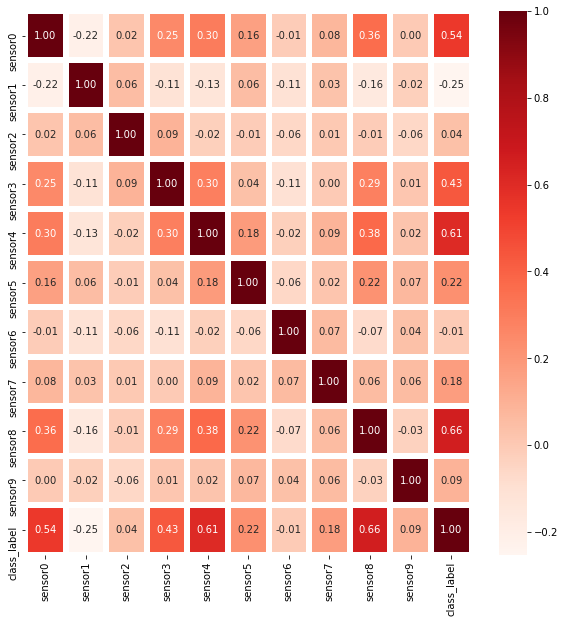

In [6]:
#Checking correlation using heatmap

data_target = pd.concat([data, target], axis=1)
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(data_target.corr(),annot=True,linewidths=5,fmt='.2f',ax=ax, cmap='Reds')
plt.show()

#### From the correlation matrix, we can note that there is little or no correlation between the features. Hence, we go ahead to train our model with these features.

Methods:
1) Feature Importance/Ranking from model coefficients
2) Feature Importance from Decision Trees
3) Permutation Feature Importance

### COEFFICIENTS AS FEATURE IMPORTANCE: LOGISTIC REGRESSION

In [7]:
# Function that sorts the feature importance in descending order 
def imp_df(column_names, importances):
    col = { 'Feature': column_names, 'Importance': importances }
    df = pd.DataFrame(col).set_index('Feature').sort_values('Importance', ascending=False)
    return df

In [9]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=4)
model = LogisticRegression(penalty='l2', class_weight='balanced') #Using L2 regularisation to avoid overfitting
model.fit(X_train, y_train)
importance = model.coef_[0]

print('Accuracy of Logistic Regression: ', accuracy_score(y_test, model.predict(X_test))*100)

print('Logistic Regression Coefficients as Feature Importances:')
print(imp_df(data.columns, importance))

Accuracy of Logistic Regression:  90.83333333333333
Logistic Regression Coefficients as Feature Importances:
         Importance
Feature            
sensor8    3.970581
sensor4    2.810411
sensor0    2.315921
sensor3    2.086430
sensor7    0.969015
sensor9    0.747803
sensor5    0.605576
sensor6    0.592174
sensor2    0.319754
sensor1   -1.158128


Recall this is a classification problem with classes 1 and -1. 
Notice that the coefficients are both positive and negative. The positive scores indicate a feature that predicts class 1, whereas the negative scores indicate a feature that predicts class -1.

No clear pattern of important and unimportant features can be identified as a whole from these results, at least from what I can tell.

### DECISION TREES FEATURE IMPORTANCE:

Decision tree algorithms like classification and regression trees (CART) offer importance scores based on the reduction in the criterion used to select split points, like Gini or entropy. This same approach can be used for ensembles of decision trees, such as the random forest and stochastic gradient boosting algorithms.

After being fit, the model provides a feature_importances_ property that can be accessed to retrieve the relative importance scores for each input feature.

#### USING BAGGED DECISION TREES

         Importance
Feature            
sensor8    0.610929
sensor6    0.269732
sensor0    0.037036
sensor7    0.029031
sensor5    0.027870
sensor2    0.025402
sensor1    0.000000
sensor3    0.000000
sensor4    0.000000
sensor9    0.000000
Sum of the model importances: 1.0
Accuracy of Decision Trees: 0.9583333333333334


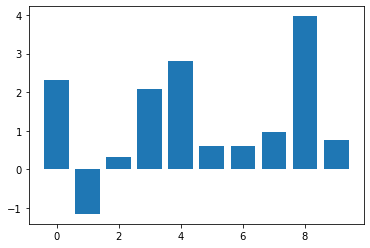

In [10]:
# decision tree for feature importance on a classification problem
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

print(imp_df(data.columns, model.feature_importances_))
print('Sum of the model importances:', sum(model.feature_importances_)) #Shows the contribution of each feature is involved
print('Accuracy of Decision Trees:', accuracy_score(y_test, model.predict(X_test)))

# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

#### RANDOM FORESTS

In [11]:

rf =  RandomForestClassifier(n_estimators = 100, n_jobs = -1, oob_score = True, bootstrap = True, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('Accuracy Score of Random Forests:', accuracy_score(y_test, y_pred)*100)

print('Random Forest - Feature Importances:')
print(imp_df(data.columns, rf.feature_importances_))
imp_df(data.columns, rf.feature_importances_).to_csv('ranking_output.csv')

Accuracy Score of Random Forests: 98.33333333333333
Random Forest - Feature Importances:
         Importance
Feature            
sensor8    0.280020
sensor6    0.200348
sensor4    0.174182
sensor0    0.141854
sensor2    0.051943
sensor1    0.049811
sensor3    0.039026
sensor9    0.026507
sensor7    0.018354
sensor5    0.017954


#### GRADIENT BOOST CLASSIFIER

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:09:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
         Importance
Feature            
sensor8    0.558239
sensor6    0.201985
sensor4    0.071096
sensor2    0.053296
sensor1    0.049673
sensor0    0.046455
sensor7    0.008780
sensor9    0.006019
sensor3    0.004458
sensor5    0.000000
Accuracy of XGBOOST: 0.9833333333333333


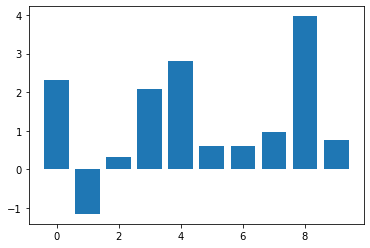

In [12]:
# fit model to training data
xgb_model = XGBClassifier(random_state =4)
xgb_model.fit(X_train, y_train)

print('Accuracy of XGBOOST:', accuracy_score(y_test, xgb_model.predict(X_test)))

print(imp_df(data.columns, xgb_model.feature_importances_))

# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()


### PERMUTATION IMPORTANCE

Permutation feature importance measures the increase in the prediction error of the model after we permuted the feature's values, which breaks the relationship between the feature and the true outcome. So, a feature is considered to be important if by shuffling its values, the model error increased because in this case the model relied on that feature for prediction.

Firstly a model is fit on the dataset. The model chosen here must be one that does not support native feature importance scores. The model is then used to make predictions on a dataset, although the values of a feature is shuffled. This is repeated for each feature in the dataset. Then this whole process is repeated 3, 5, 10 or more times. The result is a mean importance score for each input feature (and distribution of scores given the repeats). Here we use KNeighbours Classifier for training and permutation_importance() method to get the mean of the importances.


         Importance
Feature            
sensor8      0.0665
sensor4      0.0380
sensor6      0.0325
sensor0      0.0240
sensor3      0.0180
sensor2      0.0165
sensor7      0.0050
sensor1      0.0045
sensor9      0.0025
sensor5      0.0005
Accuracy of Permutation Importance: 0.9666666666666667


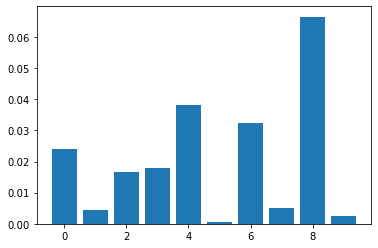

In [19]:
model = KNeighborsClassifier()
# fit the model
model.fit(X_train, y_train)
# perform permutation importance
results = permutation_importance(model, data, target, scoring='accuracy')

# get importance
importance = results.importances_mean

print(imp_df(data.columns, importance))

print('Accuracy of Permutation Importance:', accuracy_score(y_test, model.predict(X_test)))

# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

### BORUTA FEATURE SELECTION

Unlike the previously mentioned algorithms, Boruta is an all-relevant feature selection method while most algorithms are minimal optimal. What this means is that Boruta tries to find all features carrying useful information rather than a compact subset of features that give a minimal error.

In [20]:
rcf = RandomForestRegressor()
rcf.fit(X_train, y_train)

base_score = rcf.score(X_test, y_test)

boruta_selector = BorutaPy(rcf, n_estimators='auto', verbose = 2)
boruta_selector.fit(np.array(X_train), np.array(y_train))

X_train = boruta_selector.transform(np.array(X_train))
X_test = boruta_selector.transform(np.array(X_test))

rcf = xgboost.XGBRegressor()
rcf.fit(X_train, y_train)

new_score = rcf.score(X_test, y_test)
#print(imp_df(data.columns, rcf.feature_importances_))
print(rcf.feature_importances_)
change = (new_score - base_score)*100 / base_score;
print(f'Your model accuracy has been affect by {change} percent')

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	5
Tentative: 	4
Rejected: 	1
Iteration: 	9 / 100
Confirmed: 	5
Tentative: 	4
Rejected: 	1
Iteration: 	10 / 100
Confirmed: 	5
Tentative: 	4
Rejected: 	1
Iteration: 	11 / 100
Confirmed: 	5
Tentative: 	4
Rejected: 	1
Iteration: 	12 / 100
Confirmed: 	5
Tentative: 	3
Rejected: 	2
Iteration: 	13 / 100
Confirmed: 	5
Tentative: 	3
Rejected: 	2
Iteration: 	14 / 100
Confirmed: 	5
Tentative: 	3
Rejected: 	2
Iteration: 	15 / 100
Confirmed: 	5
Tentative: 	3
Rejected: 	2
Iteration: 	16 / 100
Confirmed: 	5
Tentative: 	3
Rejected: 	2
Iteration: